# Introduction
This is a test for seeing how well you can get around doing some basic statistical analyses on a dataset similar to the those that you would see while working at Carta.

In this analysis, you are assuming the role of a data scientist assigned the goal of understanding the usage of surgical supplies for different procedures and surgeons. You have been given a dataset of the supplies that are used for each surgical case, and also a second dataset which gives you the price of each of the items used in surgery. The dataset encompasses the last month of surgeries at your hospital.

## The Goal
Your goal is to answer the following questions:

 1. How many of each item were used over the last month?
 2. What is the average number of items used for each procedure? 
 3. What is the average total cost of supplies for each procedure?

### Total Item Usage
The output for 1) should look like a table with the following columns:

Item Name || Total Number of Items Used

### Average Items per Procedure
The output for 2) should be a table with the following columns:

Procedure Name || Average Number of Items Used per Case

### Average Cost per Procedure
The output for 3) should be a table with the following columns:

Procedure Name || Average Total Cost of Items Used per Case

# Dataset Overview
Here is an explanation of the dataset you have been given:

## hospital-supply-usage.csv

```
case_id: A unique identifier for a single surgical case
primary_surgeon: The surgeon on the case
primary_procedure: The name of the procedure that was performed
item_name: The name of the item used
item_id: A unique id for each item
number_used: The number of items used
number_wasted: The number of items wasted
```

## pricing.csv
```
item_id: A unique identifier for the item (will match item_id in the hospital-supply-usage.csv dataset)
price: The price of the item
```

# Sending your solution
Once you're done, export your solution to a python file (File > Download as > Python), and send it to matt@carta.healthcare.

Feel free to reach out if you have questions along the way!

In [1]:
import numpy as np
import pandas as pd
from carta_interview import Datasets, get_data_file

USAGE_FILENAME = get_data_file(Datasets.SUPPLY_USAGE)
PRICING_FILENAME = get_data_file(Datasets.PRICING)

In [2]:
supply_usage = pd.read_csv(USAGE_FILENAME)
pricing = pd.read_csv(PRICING_FILENAME)

In [3]:
supply_usage.describe()

,Unnamed: 0,case_id,item_id,number_used,number_wasted
count,1673.000000,1673.000000,1673.000000,1673.000000,1673.000000
mean,836.000000,4839.245666,5147.315601,1.028691,0.081291
std,483.097816,2571.303028,2864.236246,4.039475,2.416667
min,0.000000,170.000000,0.000000,0.000000,0.000000
25%,418.000000,2599.000000,2669.000000,0.000000,0.000000
50%,836.000000,4566.000000,5383.000000,1.000000,0.000000
75%,1254.000000,6844.000000,7597.000000,1.000000,0.000000
max,1672.000000,9969.000000,9995.000000,157.000000,89.000000


In [4]:
pricing.describe()

,Unnamed: 0,item_id,price
count,675.0,675.000000,675.000000
mean,337.0,5160.582222,120.584742
std,195.0,2906.486316,29.543607
min,0.0,0.000000,34.658178
25%,168.5,2689.000000,101.017365
50%,337.0,5355.000000,120.242564
75%,505.5,7598.000000,141.420997
max,674.0,9995.000000,203.026082


In [5]:
supply_usage.head()

,Unnamed: 0,case_id,item_id,item_name,number_used,number_wasted,primary_procedure,primary_surgeon
0,0,3873,2345,Sponge,1.0,0.0,Appendectomy,Jacqueline Ball
1,1,864,5116,Suture,1.0,0.0,Tetralogy of Fallot Repair,Christine Lane
2,2,5533,174,Catheter,1.0,0.0,Lumpectomy,Lawrence Ramos
3,3,6844,7054,Bandage,1.0,0.0,Tetralogy of Fallot Repair,Courtney Miller
4,4,6844,2742,Bandage,1.0,0.0,Tetralogy of Fallot Repair,Courtney Miller


In [6]:
supply_usage[supply_usage.case_id == 3873]

,Unnamed: 0,case_id,item_id,item_name,number_used,number_wasted,primary_procedure,primary_surgeon
0,0,3873,2345,Sponge,1.0,0.0,Appendectomy,Jacqueline Ball
207,207,3873,7382,Sponge,1.0,0.0,Appendectomy,Jacqueline Ball
242,242,3873,8801,Gloves,1.0,0.0,Appendectomy,Jacqueline Ball
313,313,3873,5317,Suture,1.0,0.0,Appendectomy,Jacqueline Ball
603,603,3873,7832,Gloves,1.0,0.0,Appendectomy,Jacqueline Ball
814,814,3873,7146,Bandage,1.0,0.0,Appendectomy,Jacqueline Ball
946,946,3873,4679,Catheter,0.0,0.0,Appendectomy,Jacqueline Ball
1020,1020,3873,2333,Sponge,1.0,0.0,Appendectomy,Jacqueline Ball
1577,1577,3873,8776,Bandage,1.0,0.0,Appendectomy,Jacqueline Ball
1626,1626,3873,2520,Sponge,1.0,0.0,Appendectomy,Jacqueline Ball


In [7]:
# join the supply usage and pricing table to get the price of each item

supply_usage_p = pd.merge(supply_usage, pricing, how = 'inner', on = 'item_id', right_index=False)
supply_usage_p.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1, inplace=True)

In [8]:
supply_usage_p.head()

,case_id,item_id,item_name,number_used,number_wasted,primary_procedure,primary_surgeon,price
0,3873,2345,Sponge,1.0,0.0,Appendectomy,Jacqueline Ball,95.139403
1,864,5116,Suture,1.0,0.0,Tetralogy of Fallot Repair,Christine Lane,128.638542
2,5533,174,Catheter,1.0,0.0,Lumpectomy,Lawrence Ramos,176.724348
3,6844,7054,Bandage,1.0,0.0,Tetralogy of Fallot Repair,Courtney Miller,103.607373
4,170,7054,Sponge,1.0,0.0,Unifocalization,Shawn Bowman,103.607373


In [9]:
supply_usage_p[supply_usage_p.case_id == 3873]

,case_id,item_id,item_name,number_used,number_wasted,primary_procedure,primary_surgeon,price
0,3873,2345,Sponge,1.0,0.0,Appendectomy,Jacqueline Ball,95.139403
249,3873,7382,Sponge,1.0,0.0,Appendectomy,Jacqueline Ball,38.507251
285,3873,8801,Gloves,1.0,0.0,Appendectomy,Jacqueline Ball,110.761939
356,3873,5317,Suture,1.0,0.0,Appendectomy,Jacqueline Ball,111.465352
647,3873,7832,Gloves,1.0,0.0,Appendectomy,Jacqueline Ball,59.931309
855,3873,7146,Bandage,1.0,0.0,Appendectomy,Jacqueline Ball,162.741934
976,3873,4679,Catheter,0.0,0.0,Appendectomy,Jacqueline Ball,109.011291
1036,3873,2333,Sponge,1.0,0.0,Appendectomy,Jacqueline Ball,129.110458
1583,3873,8776,Bandage,1.0,0.0,Appendectomy,Jacqueline Ball,72.091412
1630,3873,2520,Sponge,1.0,0.0,Appendectomy,Jacqueline Ball,104.540340


### How many of each item were used over the last month?

To begin, we can do a simple count of items in the supply table and we can see the items used (first table).

This is not the actual number of items used, because in certain cases an item is assigned but not used. This is determined by a field in the table "number_used", if this field is ">=" we can say for sure the item was used (second table). 

In [10]:
# first table

pd.DataFrame(supply_usage_p.item_name.value_counts()).reset_index().rename(columns={"index":"item_name", "item_name":"counts"})

,item_name,counts
0,Sponge,371
1,Gloves,356
2,Catheter,348
3,Suture,329
4,Bandage,269


In [11]:
# second table

supply_usage_p[supply_usage_p.number_used >= 1].groupby('item_name').size().reset_index(name='counts')

,item_name,counts
0,Bandage,186
1,Catheter,221
2,Gloves,248
3,Sponge,224
4,Suture,197


### What is the average number of items used for each procedure?

There are 4 procedure in the below case. Initially we check the average number of items required for each of the four procedures (first table).

Then we proceed to check the average number of specific items required for each of the procedure (second table).

In [12]:
# There are 4 primary procedures

supply_usage_p.primary_procedure.unique()

array(['Appendectomy', 'Tetralogy of Fallot Repair', 'Lumpectomy',
       'Unifocalization'], dtype=object)

In [37]:
# first table

temp1 = supply_usage_p.groupby('primary_procedure')['number_used'].agg('mean').reset_index().rename(columns={"number_used":"average_number"})
temp1.head()

,primary_procedure,average_number
0,Appendectomy,1.305921
1,Lumpectomy,1.245081
2,Tetralogy of Fallot Repair,0.750000
3,Unifocalization,0.813665


<AxesSubplot:xlabel='primary_procedure'>

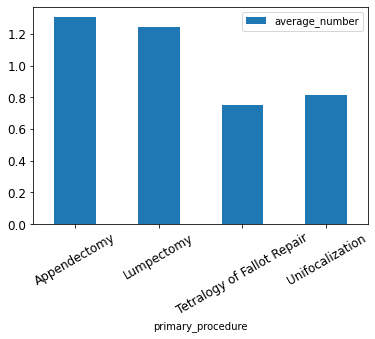

In [38]:
temp1.set_index('primary_procedure').plot.bar(rot=30, figsize=(6,4), fontsize=12)

In [39]:
# second table

temp2 = supply_usage_p.groupby(['primary_procedure','item_name'])['number_used'].agg('mean').reset_index().rename(columns={"number_used":"average_number"})
temp2

,primary_procedure,item_name,average_number
0,Appendectomy,Bandage,1.109091
1,Appendectomy,Catheter,1.522388
2,Appendectomy,Gloves,1.213115
3,Appendectomy,Sponge,1.449275
4,Appendectomy,Suture,1.153846
5,Lumpectomy,Bandage,2.721519
6,Lumpectomy,Catheter,1.018182
7,Lumpectomy,Gloves,0.834951
8,Lumpectomy,Sponge,1.307143
9,Lumpectomy,Suture,0.787402


Text(0.5, 1.0, 'Unifocalization')

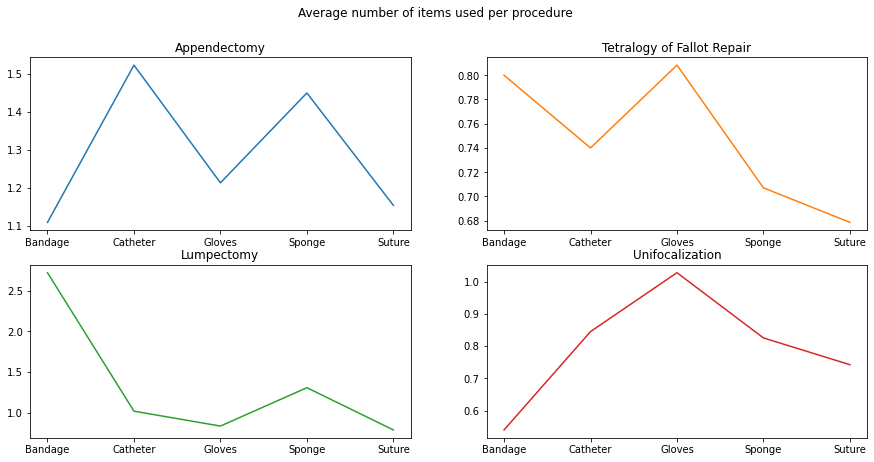

In [42]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(15,7))
fig.suptitle('Average number of items used per procedure')

axs[0, 0].plot(temp2[temp2.primary_procedure == 'Appendectomy']['item_name'], temp2[temp2.primary_procedure == 'Appendectomy']['average_number'])
axs[0, 0].set_title('Appendectomy')
axs[0, 1].plot(temp2[temp2.primary_procedure == 'Tetralogy of Fallot Repair']['item_name'], temp2[temp2.primary_procedure == 'Tetralogy of Fallot Repair']['average_number'], 'tab:orange')
axs[0, 1].set_title('Tetralogy of Fallot Repair')
axs[1, 0].plot(temp2[temp2.primary_procedure == 'Lumpectomy']['item_name'], temp2[temp2.primary_procedure == 'Lumpectomy']['average_number'], 'tab:green')
axs[1, 0].set_title('Lumpectomy')
axs[1, 1].plot(temp2[temp2.primary_procedure == 'Unifocalization']['item_name'], temp2[temp2.primary_procedure == 'Unifocalization']['average_number'], 'tab:red')
axs[1, 1].set_title('Unifocalization')

### What is the average total cost of supplies for each procedure?



In [16]:
temp3 = supply_usage_p.groupby('primary_procedure')['price'].agg('mean').reset_index().rename(columns={"price":"average_cost"})
temp3.head()

,primary_procedure,average_cost
0,Appendectomy,116.385992
1,Lumpectomy,121.960350
2,Tetralogy of Fallot Repair,120.107144
3,Unifocalization,122.079847
